<a href="https://colab.research.google.com/github/Dee-Nwanjah/Python-Pandas-Mastery-Through-Real-Data/blob/main/Tiktok_Real_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import numpy as np
from collections import Counter
import re

# Loading my data (adjust column names based on my data source)
df = pd.read_json('user_data_tiktok.json')
print("My digital footprint shape:", df.shape)
print("\nColumns available:")
print(df.columns.tolist())
df.head()

My digital footprint shape: (43, 11)

Columns available:
['Ads and data', 'App Settings', 'Comment', 'Direct Message', 'Income Plus Wallet Transactions', 'Location Review', 'Post', 'Profile', 'TikTok Shop', 'Tiktok Live', 'Your Activity']


,Ads and data,App Settings,Comment,Direct Message,Income Plus Wallet Transactions,Location Review,Post,Profile,TikTok Shop,Tiktok Live,Your Activity
Instant Form Ads Responses,{'ResponsesList': None},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Off TikTok Activity,{'OffTikTokActivityDataList': [{'TimeStamp': '...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block List,NaN,"{'App': 1, 'BlockList': None}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Settings,NaN,"{'App': 1, 'SettingsMap': {'Allow DownLoad': '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Comments,NaN,NaN,"{'App': 1, 'CommentsList': [{'date': '2025-03-...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


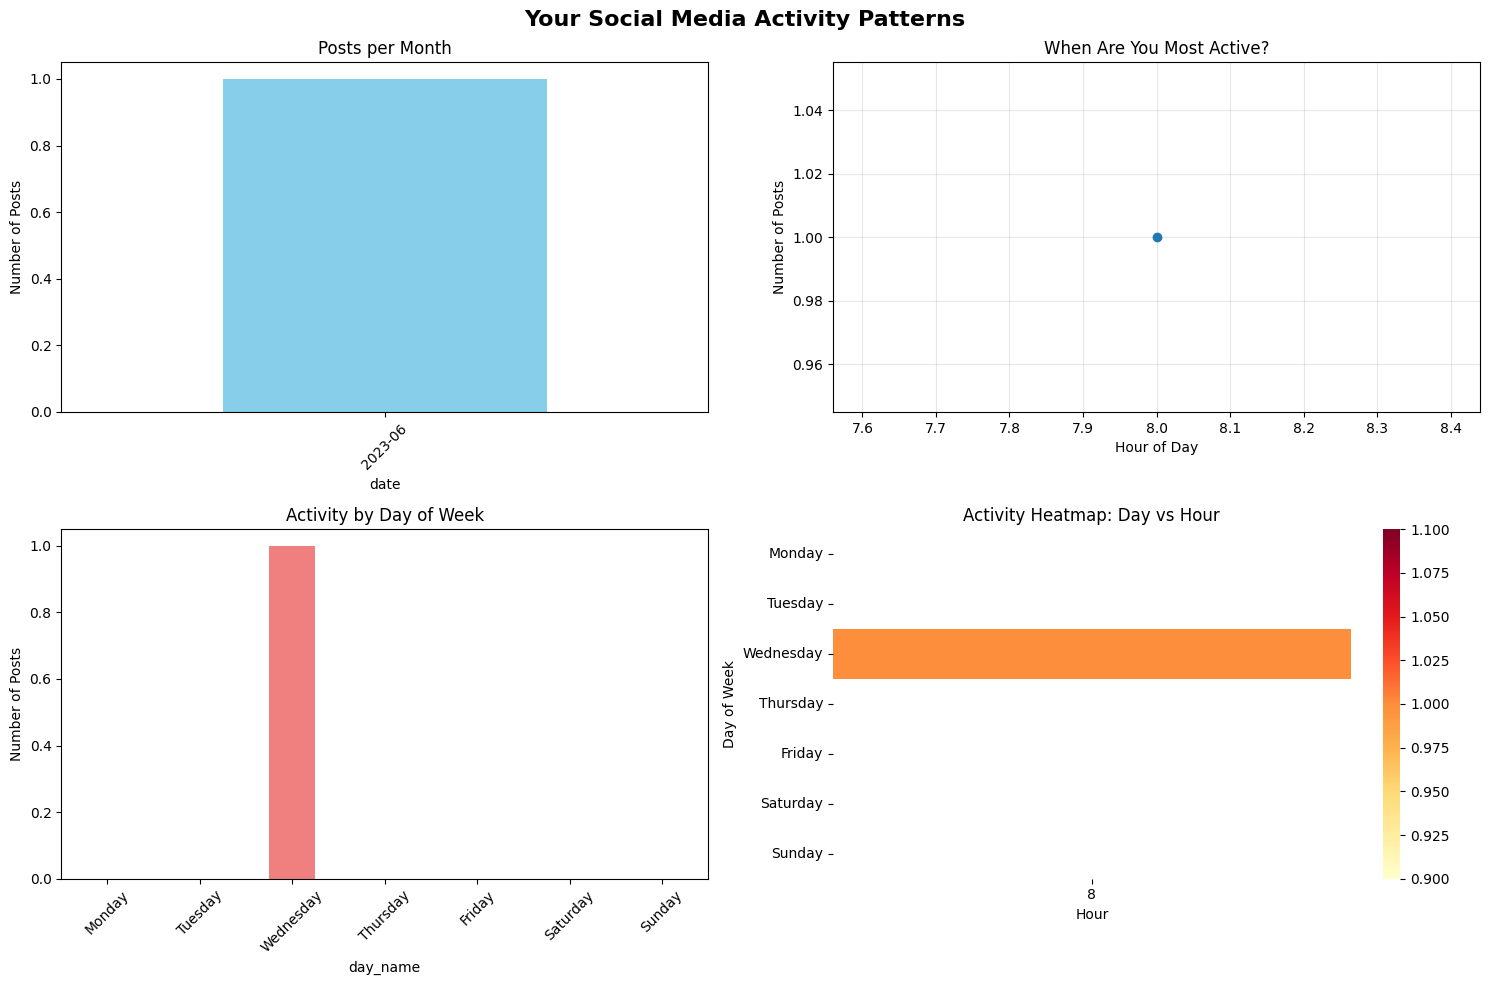

In [33]:
# Extracting dates from the 'Post' column and creating a new DataFrame
post_dates = []
for index, row in df.iterrows():
    if isinstance(row['Post'], dict) and 'VideoList' in row['Post'] and row['Post']['VideoList'] is not None:
        for video in row['Post']['VideoList']:
            if 'Date' in video:
                post_dates.append(video['Date'])

posts_df = pd.DataFrame(post_dates, columns=['date'])

# Convert 'date' to datetime objects
posts_df['date'] = pd.to_datetime(posts_df['date'])

# Extract hour and day of the week
posts_df['hour'] = posts_df['date'].dt.hour
posts_df['day_name'] = posts_df['date'].dt.day_name()


fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Your Social Media Activity Patterns', fontsize=16, fontweight='bold')

# 1. Posts per month
monthly_activity = posts_df.groupby(posts_df['date'].dt.to_period('M')).size()
monthly_activity.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Posts per Month')
axes[0, 0].set_ylabel('Number of Posts')
axes[0, 0].tick_params(axis='x', rotation=45)

# 2. Hourly activity pattern
hourly_activity = posts_df['hour'].value_counts().sort_index()
axes[0, 1].plot(hourly_activity.index, hourly_activity.values, marker='o', linewidth=2)
axes[0, 1].set_title('When Are You Most Active?')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Number of Posts')
axes[0, 1].grid(True, alpha=0.3)

# 3. Day of week pattern
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_activity = posts_df['day_name'].value_counts().reindex(day_order)
daily_activity.plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Activity by Day of Week')
axes[1, 0].set_ylabel('Number of Posts')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Activity heatmap by hour and day
activity_pivot = posts_df.groupby(['day_name', 'hour']).size().unstack(fill_value=0)
activity_pivot = activity_pivot.reindex(day_order)
sns.heatmap(activity_pivot, ax=axes[1, 1], cmap='YlOrRd', annot=False)
axes[1, 1].set_title('Activity Heatmap: Day vs Hour')
axes[1, 1].set_xlabel('Hour')
axes[1, 1].set_ylabel('Day of Week')

plt.tight_layout()
plt.show()

In [34]:
# Personal insights
print("=== MY DIGITAL BEHAVIOR INSIGHTS ===")
print(f"📱 Total posts analyzed: {len(posts_df):,}")

if len(posts_df) > 0:
    print(f"📅 Most active day: {daily_activity.idxmax()} ({daily_activity.max()} posts)")
    print(f"⏰ Peak hour: {hourly_activity.idxmax()}:00 ({hourly_activity.max()} posts)")

    time_difference = (posts_df['date'].max() - posts_df['date'].min()).days
    if time_difference == 0 and len(posts_df) > 0:
        average_posts_per_day = float(len(posts_df))
    elif time_difference > 0:
        average_posts_per_day = len(posts_df) / time_difference
    else:
        average_posts_per_day = 0.0

    print(f"📈 Average posts per day: {average_posts_per_day:.1f}")

    # Find my most productive months
    if not monthly_activity.empty:
        best_month = monthly_activity.idxmax()
        print(f"🚀 Most active period: {best_month} ({monthly_activity.max()} posts)")
else:
    print("No post data available to analyze.")

=== MY DIGITAL BEHAVIOR INSIGHTS ===
📱 Total posts analyzed: 1
📅 Most active day: Wednesday (1.0 posts)
⏰ Peak hour: 8:00 (1 posts)
📈 Average posts per day: 1.0
🚀 Most active period: 2023-06 (1 posts)


In [35]:
# If text content are available (posts, captions)
text_column = None
for col in ['text', 'content', 'tweet', 'post', 'caption']:
    if col in df.columns:
        text_column = col
        break

if text_column:
    print(f"Analyzing your {text_column} content...")

    # Basic text statistics
    df['text_length'] = df[text_column].str.len()
    df['word_count'] = df[text_column].str.split().str.len()

    print(f"📝 Average text length: {df['text_length'].mean():.1f} characters")
    print(f"📖 Average word count: {df['word_count'].mean():.1f} words")
    print(f"📏 Longest post: {df['text_length'].max()} characters")
    print(f"📏 Shortest post: {df['text_length'].min()} characters")

    # Word frequency analysis
    all_text = ' '.join(df[text_column].dropna().str.lower())

    # Remove common words and clean text
    words = re.findall(r'\b[a-z]{3,}\b', all_text)  # Words with 3+ letters
    stop_words = {'the', 'and', 'for', 'are', 'but', 'not', 'you', 'all', 'can', 'had', 'her', 'was', 'one', 'our', 'out', 'day', 'get', 'has', 'him', 'his', 'how', 'man', 'new', 'now', 'old', 'see', 'two', 'who', 'boy', 'did', 'its', 'let', 'put', 'say', 'she', 'too', 'use'}
    filtered_words = [word for word in words if word not in stop_words]

    # Get top words
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(20)

    # Plot word frequency
    words_df = pd.DataFrame(top_words, columns=['word', 'frequency'])

    plt.figure(figsize=(12, 6))
    plt.barh(words_df['word'], words_df['frequency'], color='lightgreen')
    plt.title('Your Most Used Words')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

    print("\nYour top 10 words:")
    for word, count in top_words[:10]:
        print(f"'{word}': {count} times")

In [36]:
# Engagement analysis (if likes, shares, comments columns exist within the nested data)

engagement_data = []
for index, row in df.iterrows():
    # Assuming likes are within the 'Post' -> 'VideoList' structure
    if isinstance(row['Post'], dict) and 'VideoList' in row['Post'] and row['Post']['VideoList'] is not None:
        for video in row['Post']['VideoList']:
            # Assuming 'Likes' is a key within the video dictionary
            if 'Likes' in video and 'Date' in video:
                try:
                    # Convert 'Likes' to numeric, coercing errors
                    likes = pd.to_numeric(video['Likes'], errors='coerce')
                    if not pd.isna(likes):
                         engagement_data.append({'date': video['Date'], 'likes': int(likes), 'content': video.get('Title', 'N/A')})
                except (ValueError, TypeError):
                    # Handle cases where 'Likes' cannot be converted to a number
                    pass

engagement_df = pd.DataFrame(engagement_data)

if not engagement_df.empty:
    print("=== ENGAGEMENT ANALYSIS ===")

    # Convert 'date' to datetime objects for potential future use (though not strictly needed for this cell's current output)
    engagement_df['date'] = pd.to_datetime(engagement_df['date'])


    if 'likes' in engagement_df.columns:
        avg_likes = engagement_df['likes'].mean()
        max_likes = engagement_df['likes'].max()
        print(f"📊 Average likes per post: {avg_likes:.1f}")
        print(f"🔥 Most likes on a single post: {max_likes}")

        # Find My best performing content
        if max_likes > 0:
            best_post_row = engagement_df.loc[engagement_df['likes'].idxmax()]
            print(f"\n🏆 Your most liked content:")
            # Use 'content' extracted from video title or provide a snippet if available
            if 'content' in best_post_row and best_post_row['content'] != 'N/A':
                 print(f"Content: {best_post_row['content'][:100]}...")
            else:
                 # If no specific content title, indicate the date and likes
                 print(f"Content from {best_post_row['date'].strftime('%Y-%m-%d %H:%M')} with {best_post_row['likes']} likes.")

            print(f"Likes: {best_post_row['likes']}")
            print(f"Date: {best_post_row['date'].strftime('%Y-%m-%d %H:%M')}")
else:
    print("No engagement data found in the 'Post' column.")

=== ENGAGEMENT ANALYSIS ===
📊 Average likes per post: 0.0
🔥 Most likes on a single post: 0


In [37]:
# Generate comprehensive personal report
report = f"""
=== My TIKTOK ANALYTICS REPORT (Posts) ===
Generated: {datetime.now().strftime('%Y-%m-%d %H:%M')}

📊 ACTIVITY SUMMARY:
- Total posts: {len(posts_df):,}
- Date range: {posts_df['date'].min().strftime('%Y-%m-%d')} to {posts_df['date'].max().strftime('%Y-%m-%d')}
- Days active: {(posts_df['date'].max() - posts_df['date'].min()).days:,}
- Average posts/day: {len(posts_df) / max(1, (posts_df['date'].max() - posts_df['date'].min()).days):.2f}

⏰ TIMING PATTERNS:
- Most active day: {daily_activity.idxmax()}
- Peak posting hour: {hourly_activity.idxmax()}:00
- Most active month: {monthly_activity.idxmax()}

📱 BEHAVIOR INSIGHTS:
- I am most consistent on: {daily_activity.idxmax()}
- My peak energy time: {hourly_activity.idxmax()}:00
- Most productive period: {monthly_activity.idxmax()}
"""

# Check if text analysis was performed and results are available
if 'text_length' in df.columns and not df['text_length'].isnull().all():
    report += f"""
📝 CONTENT ANALYSIS:
- Average text length: {df['text_length'].mean():.0f} characters
- Average words per post: {df['word_count'].mean():.1f}
- Most used word: '{top_words[0][0]}' ({top_words[0][1]} times)
"""

print(report)

# Save report to file
with open('My_TikTok_report.txt', 'w') as f:
    f.write(report)

print("📄 Report saved as 'My_TikTok_report.txt'")


=== My TIKTOK ANALYTICS REPORT (Posts) ===
Generated: 2025-08-02 14:10

📊 ACTIVITY SUMMARY:
- Total posts: 1
- Date range: 2023-06-07 to 2023-06-07
- Days active: 0
- Average posts/day: 1.00

⏰ TIMING PATTERNS:
- Most active day: Wednesday
- Peak posting hour: 8:00
- Most active month: 2023-06

📱 BEHAVIOR INSIGHTS:
- I am most consistent on: Wednesday
- My peak energy time: 8:00
- Most productive period: 2023-06

📄 Report saved as 'My_TikTok_report.txt'
